# Claude Glycemic Load Estimation
1. Sent to Claude 700 image pairs of RGB+RGBD from Nutrition5k dataset.
2. Asked to estimate the glycemic load of the meal.
3. Calculated MAE and got deviation of 7.83.
4. Calculated R squared and got 0.0026.

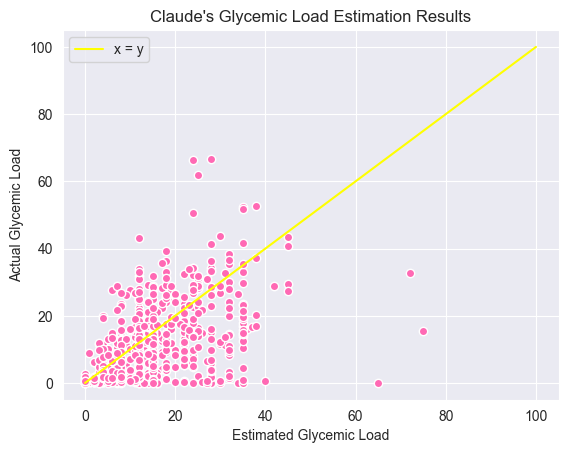

In [9]:
from IPython.display import Image, display
image_path = r"C:\Users\rotem.geva\PycharmProjects\GlycemicLoad\Portions Estimation\outputs\visualizations\Claude Glycemic Estimation Results.png"
display(Image(filename=image_path))

# Untrained ResNet18 with RGB+depth Channel (total 4 channels)

## Current Dataset Distribution
- The dataset is biased, due to restriced dataset.

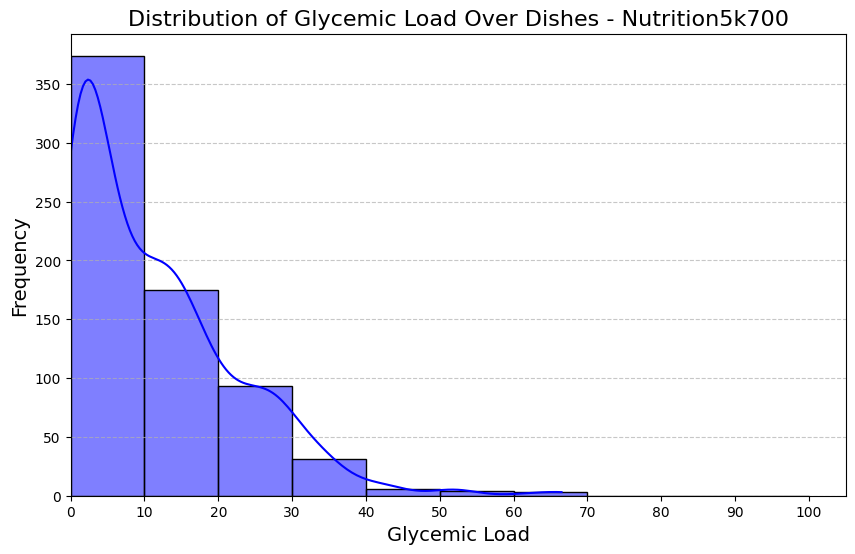

In [8]:
from IPython.display import Image, display
image_path = r"C:\Users\rotem.geva\PycharmProjects\GlycemicLoad\Portions Estimation\outputs\visualizations\Distribution of the glycemic load of Over Dishes - Nutrition5k700.png"
display(Image(filename=image_path))

## Data Processing steps:
1. Resized images to 224x224.
2. Normalized RGB image and depth channel separately using std = 1 and mean = 0. Then, concatenated into a 4 dimension tensor.
3. Used split: 60, 20,20.
4. Used the following augmentation for dataset:
        transform = T.Compose([
        T.RandomHorizontalFlip(p=0.5),
        T.RandomRotation(degrees=15),
        T.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1), # Expects [1 or 3, H , W]
    ])

## Model Architecture:
1. Adapted first conv layer to receive 4 channels:
    self.resnet.conv1 = nn.Conv2d(4, 64, kernel_size=(3, 3), stride=(2, 2), padding=(3, 3), bias=False)
2. Adapted last layer to be a regression layer:
    self.resnet.fc = nn.Linear(in_features=512, out_features=1)
3. Used AdamW optimizer (initially used weight decay but at the end I changed it, and forgot to adapt the optimizer).
4. Used MSE loss function.
5. Used learning rate of 0.00001.
6. Trained the model for 1700 epochs with batch size of 32.

## Results:
1. MSE = 51.6, meaning the model is wrong by 7.18 units - there is an error of 67% from the current average meal which is 11.5 glycemic load.
2. R Squared = 0.59, meaning only 59% of the variance in the data is explained by the model.
3. A lot of clustering in the lower values, there might be bias in the data (already known).
4. Residuals are small and close to y=0 in the lower range - the model predicts low glycemic load better.
    The residuals are larger and more scattered for higher predicted values - the model struggles to predict higher glycemic loads.
- **Note**: Currently the dataset contains only dishes with relatively low glycemic load, so there is an intentional bias.

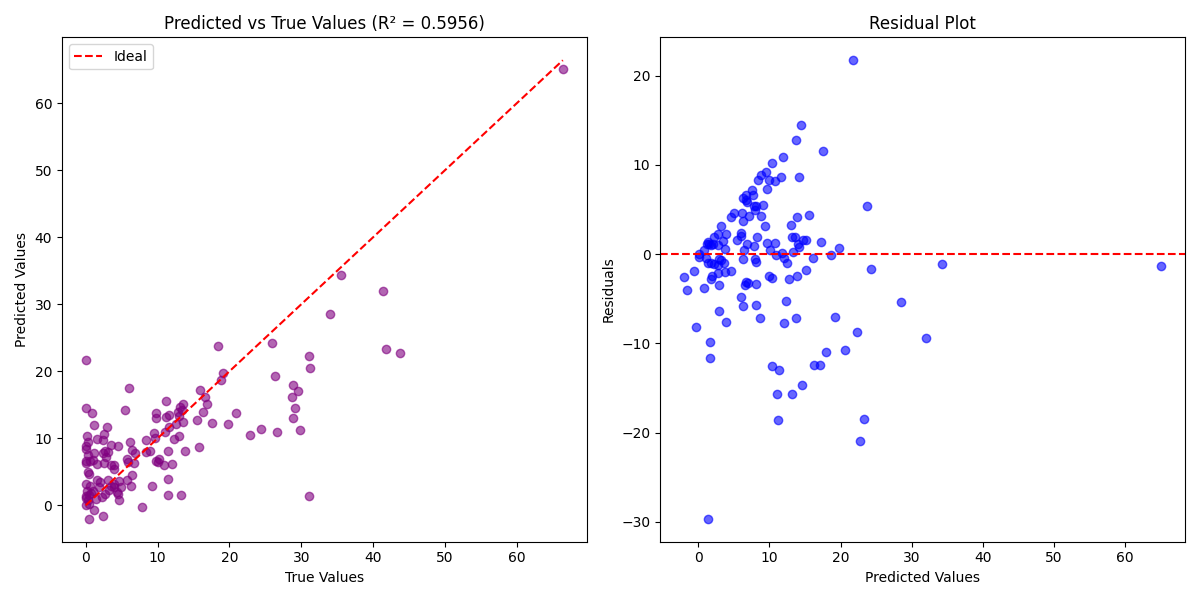

In [4]:
from IPython.display import Image, display
image_path = r"Portions Estimation/outputs/visualizations/not_pretrained_resnet18_batch32_lr0.00001_regression_plots.png"
display(Image(filename=image_path))

## Next Steps
1. Add more dishes of high glycemic load.
2. Experiment with deeper networks (ResNet50 for start) - to capture more complex structures in my data.